# Assignment 5 - 60 points possible

## Apple, Bird, Cookie:
## Data from Google's Quick, Draw!  Game

We will perform 2 tasks in this homework.  The first is to build a classifier that can tell whether a drawing is of an apple, a bird, or a cookie.  The data is taken from a game you can play online, developed by Google, called Quick, Draw!  The drawings are all Pictionary-style quick sketches of things.  Google has already done the work of turning the drawings into grayscale 28 x 28 images that are good for machine learning.  Since the images don't have that many pixels, the drawings are simplified, and there is a lot of data, this is an example of a relatively easy task for machine learning generally and neural networks in particular.  (There are many similar datasets here:  https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap;tab=objects?pli=1&prefix=&forceOnObjectsSortingFiltering=false)

Before you do anything else in this assignment, it's *strongly recommended* that you do two things with your Google Colab setup.  First, go to the upper right and select "Connect to a hosted runtime."  Second, go to the menu at the top and select Runtime->Change runtime type->Pick GPU.  Selecting "GPU" will dramatically speed up the training times for the neural networks in this assignment.  But, picking GPU also resets the runtime, which is why you should do this before anything else.

Download the two zip files associated with this homework at https://drive.google.com/file/d/14ZkNqKC34mUW5yUa6WjYWf1R-CempaoB/view?usp=sharing and https://drive.google.com/file/d/14UmGyFC_WSywNcm2yrCfe0x04IuA42O8/view?usp=sharing and place them in your own Google Drive.  Then run the code boxes below (possibly modifying the path) to mount the drive and unzip the files.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# You may need to change "NNAssign" to your own directory name
!unzip gdrive/MyDrive/NNAssign/apple_bird_cookie.zip

Archive:  gdrive/MyDrive/NNAssign/apple_bird_cookie.zip
replace full_numpy_bitmap_apple.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace full_numpy_bitmap_apple.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: full_numpy_bitmap_apple.npy  
  inflating: __MACOSX/._full_numpy_bitmap_apple.npy  
  inflating: full_numpy_bitmap_bird.npy  
  inflating: __MACOSX/._full_numpy_bitmap_bird.npy  
  inflating: full_numpy_bitmap_cookie.npy  
  inflating: __MACOSX/._full_numpy_bitmap_cookie.npy  


In [ ]:
import numpy as np

apples = np.load('full_numpy_bitmap_apple.npy')
birds = np.load('full_numpy_bitmap_bird.npy')
cookies = np.load('full_numpy_bitmap_cookie.npy')

(1, 2pts) Call np.concatenate to join the three datasets together into a single array called "all_kinds".  Notice that the three datasets should be passed to np.concatenate as a tuple.


In [ ]:
obj_tuple = ((apples, birds, cookies))
all_kinds = np.concatenate(obj_tuple)
print((apples))
print('\n')
print((birds))
print('\n')
print((cookies))
print('\n')
print((all_kinds))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(2, 3 pts) Now we need a list of labels that is as long as all_kinds.  Create a list named "labels" that is as long as all_kinds, where each element identifies which kind of drawing can be found at that place in all_kinds.  Label apples as 0, birds as 1, and cookies as 2.  (You may find it useful to call len() on the apples, birds, and cookies arrays.)

In [ ]:
apples_l = [0] * len(apples)
birds_l = [1] * len(birds)
cookies_l = [2] * len(cookies)
labels = []
labels = apples_l + birds_l + cookies_l
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Now we'll call train_test_split to separate the data into training and testing data.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(all_kinds, labels)

(3, 2pts) This data ranges from 0 to 255, but neural networks tend to work best when the data is between 0 and 1.
Scale the train and test data by dividing it by 255.

In [ ]:
for i in x_train:
  i = i/255
for j in x_test:
  j = j/255

(4, 5pts) If we examine the shape of x, it isn't quite what we want yet - it is an array of arrays that are of size length-of-data x 784.  784 is 28x28, and we want our convolutional neural networks to perceive the data as a 28x28 square instead of one long array of 784 elements.  Call x_train.reshape() and x_test.reshape() so that their dimensions are length-of-data x 28 x 28.  (Note that reshape expects a tuple that is the size as its argument.  You can pass -1 as one of the dimensions if you don't want to figure out how long the array is.)

In [ ]:
x_train[0].shape

(784,)

In [ ]:
x_train = x_train.reshape(len(x_train), 28, 28)

In [ ]:
x_test = x_test.reshape(len(x_test), 28, 28)

If your reshape worked correctly, the following code should show a apple, bird, or cookie sketch.  If it didn't work, it will look like random noise.  If you're not sure, you can always try more images.

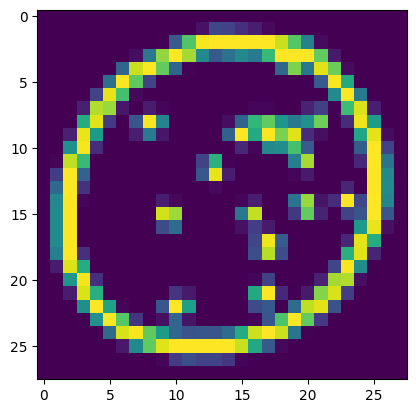

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[183]) # Should be a recognizable image if we reshaped correctly

As the last step before creating the neural network, we will turn the labels into one-hot encodings, like [0,0,1] instead of 2.  There's a handy keras function that does this, and we're just going to call it for you.

In [ ]:
from tensorflow import keras
num_classes = 3
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(5, 9pts) Rather than create a network completely from scratch, it makes sense to start with a network that you know does something similar.  One of the keras tutorials shows how to do digit recognition with a relatively small deep neural network.  The dataset, the MNIST digit dataset, is very similar to ours because it consists of 28 x 28 black and white line drawings.  Consult the "Build a Model" and "Train the model" sections of https://keras.io/examples/vision/mnist_convnet/ and get that neural network running on our apple, bird, and cookie data.  (Be sure to leave a comment indicating that you borrowed the structure from there.)


In [ ]:
import numpy as np
from tensorflow import keras
from keras import layers
input_shape = (28, 28, 1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
2161/2161 [==============================] - 23s 5ms/step - loss: 0.2319 - accuracy: 0.9445 - val_loss: 0.0847 - val_accuracy: 0.9721
Epoch 2/15
2161/2161 [==============================] - 11s 5ms/step - loss: 0.1051 - accuracy: 0.9667 - val_loss: 0.0766 - val_accuracy: 0.9763
Epoch 3/15
2161/2161 [==============================] - 11s 5ms/step - loss: 0.0928 - accuracy: 0.9702 - val_loss: 0.0685 - val_accuracy: 0.9779
Epoch 4/15
2161/2161 [==============================] - 11s 5ms/step - loss: 0.0867 - accuracy: 0.9723 - val_loss: 0.0650 - val_accuracy: 0.9783
Epoch 5/15
2161/2161 [==============================] - 10s 5ms/step - loss: 0.0833 - accuracy: 0.9735 - val_loss: 0.0643 - val_accuracy: 0.9802
Epoch 6/15
2161/2161 [==============================] - 11s 5ms/step - loss: 0.0820 - accuracy: 0.9740 - val_loss: 0.0630 - val_accuracy: 0.9795
Epoch 7/15
2161/2161 [==============================] - 11s 5ms/step - loss: 0.0795 - accuracy: 0.9746 - val_loss: 0.0607 - val_ac

(6, 2pts) Evaluate the model on the test set with the code below.  You should have a test accuracy well above 90%.

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.06422080099582672
Test accuracy: 0.9798949360847473


## Cats and Dogs

It was relatively easy to get good performance on that task, because the size of each input is small and the features needed for success weren't too complicated.  We'll now try a classification task with real images.  This is a moderately well-known "cats and dogs" dataset.  Unzip the dogs-vs-cats dataset in the current directory.  You can examine the files to see pictures of cats and dogs with varying dimensions and varying poses.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip gdrive/MyDrive/NNAssign/dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: dogs-vs-cats/train/cats/cat.2260.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.2260.jpg  
  inflating: dogs-vs-cats/train/cats/cat.594.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.594.jpg  
  inflating: dogs-vs-cats/train/cats/cat.5269.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.5269.jpg  
  inflating: dogs-vs-cats/train/cats/cat.2506.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.2506.jpg  
  inflating: dogs-vs-cats/train/cats/cat.11051.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.11051.jpg  
  inflating: dogs-vs-cats/train/cats/cat.3618.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.3618.jpg  
  inflating: dogs-vs-cats/train/cats/cat.4177.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.4177.jpg  
  inflating: dogs-vs-cats/train/cats/cat.8995.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.8995.jpg  
  inflating: dogs-vs-cats/tra

In [ ]:
!ls

dogs-vs-cats  gdrive  __MACOSX	sample_data


In [ ]:
import tensorflow as tf
image_size = (180, 180)
batch_size = 32
# Data from https://www.kaggle.com/competitions/dogs-vs-cats/
# Code from https://keras.io/examples/vision/image_classification_from_scratch/
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs-vs-cats/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs-vs-cats/train",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


(7, 9pts) We'll suppose that the closest starting point network we have on hand for this is the MNIST network again.  Adapt it to this dataset with the following changes:

* The input shape is 180 x 180 x 3.
* Put the rescaling of dividing values by 255 in the network itself with a layers.Rescaling() layer after the Input layer.  https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling
* The final "softmax" activation function is only appropriate for multiclass classification.  Change this to a more appropriate activation function for binary classification.
* Name the model model2 to work with the training code below.

In [ ]:
import numpy as np
from tensorflow import keras
from keras import layers
input_shape = (180, 180, 3)
num_classes = 1

model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        tf.keras.layers.Rescaling(1./255, 0.0),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)


You can train the network using the following code.

In [ ]:
epochs = 15

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model2.fit(train_ds, epochs=epochs, validation_data=val_ds) # Validation data instead of fraction

Epoch 1/15
625/625 [==============================] - 39s 61ms/step - loss: 0.6117 - accuracy: 0.6558 - val_loss: 0.5098 - val_accuracy: 0.7540
Epoch 2/15
625/625 [==============================] - 39s 62ms/step - loss: 0.4981 - accuracy: 0.7620 - val_loss: 0.4830 - val_accuracy: 0.7732
Epoch 3/15
625/625 [==============================] - 36s 56ms/step - loss: 0.4351 - accuracy: 0.7979 - val_loss: 0.4471 - val_accuracy: 0.7914
Epoch 4/15
625/625 [==============================] - 38s 60ms/step - loss: 0.3919 - accuracy: 0.8228 - val_loss: 0.4539 - val_accuracy: 0.7952
Epoch 5/15
625/625 [==============================] - 36s 57ms/step - loss: 0.3452 - accuracy: 0.8459 - val_loss: 0.4810 - val_accuracy: 0.7916
Epoch 6/15
625/625 [==============================] - 36s 57ms/step - loss: 0.3140 - accuracy: 0.8608 - val_loss: 0.4772 - val_accuracy: 0.7992
Epoch 7/15
625/625 [==============================] - 38s 60ms/step - loss: 0.2804 - accuracy: 0.8820 - val_loss: 0.4826 - val_accuracy:

(8, 6pts) The validation loss went down and then up, indicating overfitting, so we possibly could proceed to regularization steps at this point; nevertheless, for photos, we probably want to try some deeper architectures than for the hand drawings.  Probably, the features extracted for the MNIST and apple/bird/cookie datasets are simpler than what's necessary for photos.  This implies needing more layers.  One strategy used by some well-known networks is to add blocks each consisting of a Conv2D layer followed by MaxPooling2D layer, where each Conv2D layer has twice as many filters as the last one (so 32, 64, 128 ...).  You can see our current architecture already follows this pattern.  Try training networks with one, two, and three more of these blocks between the last MaxPooling2D layer and the Flatten() call.

In [ ]:
import numpy as np
from tensorflow import keras
from keras import layers
input_shape = (180, 180, 3)
num_classes = 1

model3   = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        tf.keras.layers.Rescaling(1./255, 0.0),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)


In [ ]:
epochs = 15

model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model3.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/15
625/625 [==============================] - 41s 61ms/step - loss: 0.5937 - accuracy: 0.6683 - val_loss: 0.5123 - val_accuracy: 0.7536
Epoch 2/15
625/625 [==============================] - 40s 64ms/step - loss: 0.4786 - accuracy: 0.7710 - val_loss: 0.4338 - val_accuracy: 0.7984
Epoch 3/15
625/625 [==============================] - 42s 66ms/step - loss: 0.4240 - accuracy: 0.8078 - val_loss: 0.4230 - val_accuracy: 0.8064
Epoch 4/15
625/625 [==============================] - 42s 67ms/step - loss: 0.3746 - accuracy: 0.8349 - val_loss: 0.3997 - val_accuracy: 0.8262
Epoch 5/15
625/625 [==============================] - 42s 67ms/step - loss: 0.3351 - accuracy: 0.8552 - val_loss: 0.3778 - val_accuracy: 0.8370
Epoch 6/15
625/625 [==============================] - 37s 58ms/step - loss: 0.3014 - accuracy: 0.8706 - val_loss: 0.3618 - val_accuracy: 0.8484
Epoch 7/15
625/625 [==============================] - 37s 59ms/step - loss: 0.2701 - accuracy: 0.8852 - val_loss: 0.3974 - val_accuracy:

In [ ]:
import numpy as np
from tensorflow import keras
from keras import layers
input_shape = (180, 180, 3)
num_classes = 1

model4   = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        tf.keras.layers.Rescaling(1./255, 0.0),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

In [ ]:
epochs = 15

model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model4.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/15
625/625 [==============================] - 42s 63ms/step - loss: 0.6330 - accuracy: 0.6273 - val_loss: 0.5431 - val_accuracy: 0.7308
Epoch 2/15
625/625 [==============================] - 38s 60ms/step - loss: 0.4935 - accuracy: 0.7620 - val_loss: 0.4775 - val_accuracy: 0.7738
Epoch 3/15
625/625 [==============================] - 40s 63ms/step - loss: 0.3976 - accuracy: 0.8205 - val_loss: 0.3551 - val_accuracy: 0.8400
Epoch 4/15
625/625 [==============================] - 39s 62ms/step - loss: 0.3298 - accuracy: 0.8559 - val_loss: 0.3121 - val_accuracy: 0.8654
Epoch 5/15
625/625 [==============================] - 42s 68ms/step - loss: 0.2860 - accuracy: 0.8770 - val_loss: 0.3193 - val_accuracy: 0.8600
Epoch 6/15
625/625 [==============================] - 43s 68ms/step - loss: 0.2409 - accuracy: 0.8992 - val_loss: 0.2547 - val_accuracy: 0.8922
Epoch 7/15
625/625 [==============================] - 40s 63ms/step - loss: 0.2119 - accuracy: 0.9129 - val_loss: 0.2735 - val_accuracy:

In [ ]:
import numpy as np
from tensorflow import keras
from keras import layers
input_shape = (180, 180, 3)
num_classes = 1

model5   = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        tf.keras.layers.Rescaling(1./255, 0.0),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

In [ ]:
epochs = 15

model5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model5.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/15
625/625 [==============================] - 43s 63ms/step - loss: 0.6544 - accuracy: 0.5969 - val_loss: 0.5895 - val_accuracy: 0.6914
Epoch 2/15
625/625 [==============================] - 40s 64ms/step - loss: 0.5361 - accuracy: 0.7291 - val_loss: 0.4723 - val_accuracy: 0.7682
Epoch 3/15
625/625 [==============================] - 40s 64ms/step - loss: 0.4213 - accuracy: 0.8060 - val_loss: 0.4278 - val_accuracy: 0.7962
Epoch 4/15
625/625 [==============================] - 40s 63ms/step - loss: 0.3423 - accuracy: 0.8465 - val_loss: 0.3217 - val_accuracy: 0.8670
Epoch 5/15
625/625 [==============================] - 38s 61ms/step - loss: 0.2774 - accuracy: 0.8802 - val_loss: 0.2670 - val_accuracy: 0.8850
Epoch 6/15
625/625 [==============================] - 40s 64ms/step - loss: 0.2301 - accuracy: 0.9047 - val_loss: 0.2638 - val_accuracy: 0.8866
Epoch 7/15
625/625 [==============================] - 40s 64ms/step - loss: 0.1946 - accuracy: 0.9191 - val_loss: 0.2985 - val_accuracy:

(9, 6pts) Architecture search could continue all day, but let's take a different approach to improving the network further.  When the accuracy on the training data is higher than the validation accuracy, this is evidence of overfitting.  Two approaches to handling overfitting are:

* More dropout.  We have one big layer of dropout, but we could have one or more additional layers of Dropout(0.2).
* Data augmentation.  If the dataset is randomly rotated and flipped, this encourages features that are robust against these transformations, and it makes it harder to overfit the data.  We can work this into the pipeline itself with layers.RandomFlip("horizontal") and layers.RandomRotation(0.1).

Train a new network with these two ideas worked into your best architecture so far.  (Your best architecture is the one that you achieved the highest validation accuracy on.)  The dropout locations are up to you.  Use 20 epochs instead of 15, since these methods slow down the learning somewhat.

In [ ]:
import numpy as np
from tensorflow import keras
from keras import layers
input_shape = (180, 180, 3)
num_classes = 1

model6   = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        tf.keras.layers.Rescaling(1./255, 0.0),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.RandomRotation(0.1),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.RandomFlip("horizontal"),
        layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

In [ ]:
epochs = 20

model6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model6.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/20
625/625 [==============================] - 53s 78ms/step - loss: 0.6784 - accuracy: 0.5569 - val_loss: 0.6341 - val_accuracy: 0.6266
Epoch 2/20
625/625 [==============================] - 47s 75ms/step - loss: 0.5905 - accuracy: 0.6841 - val_loss: 0.5269 - val_accuracy: 0.7404
Epoch 3/20
625/625 [==============================] - 47s 75ms/step - loss: 0.5049 - accuracy: 0.7533 - val_loss: 0.4873 - val_accuracy: 0.7582
Epoch 4/20
625/625 [==============================] - 47s 75ms/step - loss: 0.4432 - accuracy: 0.7901 - val_loss: 0.4423 - val_accuracy: 0.7782
Epoch 5/20
625/625 [==============================] - 52s 83ms/step - loss: 0.3973 - accuracy: 0.8193 - val_loss: 0.3340 - val_accuracy: 0.8492
Epoch 6/20
625/625 [==============================] - 47s 75ms/step - loss: 0.3485 - accuracy: 0.8463 - val_loss: 0.4108 - val_accuracy: 0.8030
Epoch 7/20
625/625 [==============================] - 47s 74ms/step - loss: 0.3157 - accuracy: 0.8649 - val_loss: 0.4545 - val_accuracy:

(10, 7pts) Rather than building a model from nearly scratch, a different approach ("transfer learning") is to take an existing model that did something similar, including its trained weights, and retrain only a few layers at the very end of the model, keeping the rest of the model "frozen."  This allows complex features learned from a lot of data to be used on smaller problems with less data, and it saves on training time as well.

You can base your code on the transfer learning example provided in lecture.  (Note that since this is a binary classification problem instead of multiclass, you will need to change the final layer's activation function and the loss function.)  You should keep the "adam" optimizer we've been using all along.  You should only need to train to 7 epochs.

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
model7 = VGG16(include_top=False, input_shape=(180, 180, 3)) # we'll replace the "top" with our own layers
for layer in model.layers:
    layer.trainable = False  # these won't learn
# add new classifier layers
flat = layers.Flatten()(model.layers[-1].output) # connect to last layer of VGG
drop1 = layers.Dropout(0.5)(flat)
cls = layers.Dense(128, activation='relu')(drop1)
drop2 = layers.Dropout(0.5)(cls)
output = layers.Dense(10, activation='sigmoid')(drop2)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# compile model - note we never did to_categorical so we'll use
# sparse_categorical_crossentropy
model7.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model7.fit(train_ds, epochs=7,validation_data=val_ds)

Epoch 1/7


InvalidArgumentError: ignored

(11, 9pts) Last, answer these questions.

(a, 3pts) Increasing the complexity of the network, by adding more layers for example, increases the chance that the network will overfit.  Why?

It means that the code will have more opportunity to find more patterns in the data but this may be just specific to the data we have on hand, not to the trends we would want the NN to recognize.

(b, 3pts) In your own words, how does dropout reduce overfitting?

Dropout reduces overfitting by temporarily removing nodes and creating a new network, this prevents overfitting by forcing new nodes to the front of the decision-making and decreasing the likelihood of nodes overcompensating for others

(c, 3pts) Transfer learning is effective, and it's more effective the more similar the original task was to the present one.  Skim the Wikipedia page on ImageNet, the dataset used to train VGG-16 (and maybe follow up by searching this subset of ImageNet's classes: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Is there reason to think transfer learning with VGG-16 might be particularly effective for classifying cats and dogs?

Considering that VGG-16 is already able to classify a wide range of different organisms in particular multiple species of dogs I would think that it should be moderately effective at being able to classify between dogs and cats.


**When you're done, use "File->Download .ipynb" and upload your .ipynb file to Blackboard, along with a PDF version (File->Print->Save as PDF) of your assignment.**